In [ ]:
# https://python-course.eu/machine-learning/k-nearest-neighbor-classifier-with-sklearn.php

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

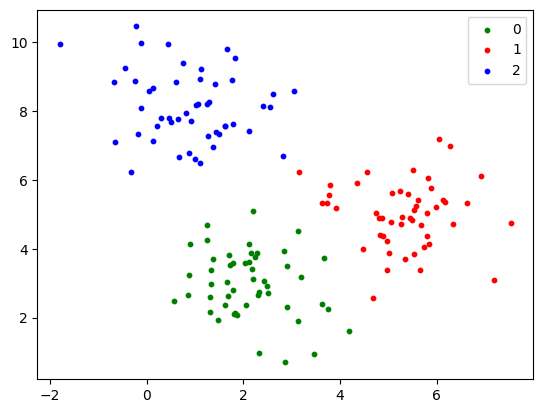

In [2]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



ax.legend(loc='upper right');

In [3]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)

train_data, test_data, train_labels, test_labels = res 

In [4]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(test_labels)

Predictions from the classifier:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
Target values:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]


In [5]:
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1]
example_labels      = [0, 1, 2, 3, 2, 1, 1]
print(accuracy_score(example_predictions, example_labels))

0.5714285714285714


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
data, labels = iris.data, iris.target

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res 

In [7]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 


print("Predictions from the classifier:")
test_data_predicted = knn.predict(test_data)
print(test_data_predicted)
print("Target values:")
print(test_labels)

Predictions from the classifier:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 2 0 1 2 1 0 2 1 1 0 0]
Target values:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 2 1 0 2 1 1 0 0]


In [8]:
print(accuracy_score(test_data_predicted, test_labels))

0.9666666666666667


In [9]:
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


In [10]:
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

0.9666666666666667

In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5], [2.4, 2.6]]
y = [0, 0, 1, 1, 0, 1, 1]

neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))

print(neigh.predict([[3.1, 2.1]]))

[0]
[1]


In [12]:
neigh = RadiusNeighborsClassifier(radius=1.0,
                                  outlier_label='most_frequent')
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))

# the following is the previously mentioned outlier:
print(neigh.predict([[30, 20]]))

[0]
[1]


In [13]:
from sklearn.neighbors import RadiusNeighborsClassifier

X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5], [2.4, 2.6], [10000, -2321]]
y = [0, 0, 1, 1, 0, 1, 1, 2]

neigh = RadiusNeighborsClassifier(radius=1.0,
                                  outlier_label=2)
neigh.fit(X, y)

print(neigh.predict([[1.5, 1.2]]))
print(neigh.predict([[30, 20]]))

[0]
[2]


In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [9, 2], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=255, 
                          centers=np.array(centers),
                          cluster_std = 1.3,
                          random_state=1)
data[:5]

array([[10.88685804,  1.1965521 ],
       [ 9.67101133,  9.0694324 ],
       [ 4.56489073, 10.19679965],
       [ 8.99754107,  0.18439345],
       [ 1.10084102,  2.48422042]])

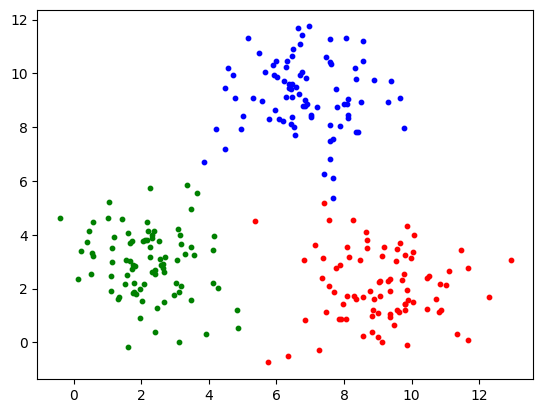

In [15]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3    # not using the outlier 'class'

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

In [16]:
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 

In [17]:
outlier = [4242.2, 4242.2]
train_data = np.vstack([train_data, outlier])
train_data[-3:]

array([[   8.42869523,    7.82787516],
       [   8.01064497,    8.84559748],
       [4242.2       , 4242.2       ]])

In [18]:
outlier_label = len(np.unique(labels))
train_labels = np.append(train_labels, outlier_label)
train_labels[-10:]

array([0, 0, 0, 1, 0, 0, 0, 2, 2, 3])

In [19]:
rnn = RadiusNeighborsClassifier(radius=1)
rnn.fit(train_data, train_labels)

RadiusNeighborsClassifier(radius=1)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # necessary to reduce biases of large numbers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 

dataset = pd.read_csv("./data/strange_flowers.txt", 
                      header=None, 
                      names=["red", "green", "blue", "size", "label"],
                      sep=" ")
dataset

,red,green,blue,size,label
0,249.0,108.0,5.0,3.62,1.0
1,240.0,115.0,13.0,3.71,1.0
2,239.0,102.0,19.0,4.04,1.0
3,247.0,100.0,2.0,4.16,1.0
4,248.0,95.0,6.0,3.78,1.0
...,...,...,...,...,...
790,197.0,242.0,93.0,2.49,4.0
791,197.0,254.0,109.0,3.47,4.0
792,197.0,251.0,97.0,2.70,4.0
793,197.0,244.0,106.0,2.93,4.0


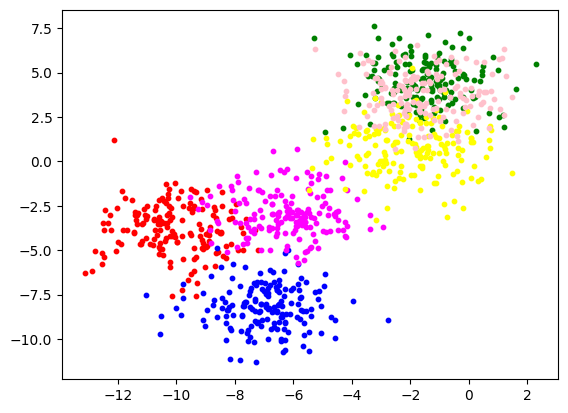

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


n_classes = 6
data, labels = make_blobs(n_samples=1000, 
                          centers=n_classes,
                          cluster_std = 1.3,
                          random_state=1)
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'pink')

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

700 300 700


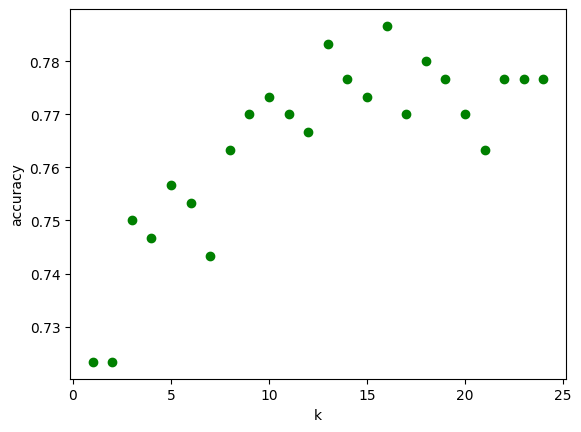

In [22]:
res = train_test_split(data, labels, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 

print(len(train_data), len(test_data), len(train_labels))

X, Y = [], []
for k in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors=k, 
                                      p=2,    # Euclidian
                                      metric="minkowski")
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    score = accuracy_score(test_labels, predictions)
    X.append(k)
    Y.append(score)
    


fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.plot(X, Y, "go")